<a href="https://www.kaggle.com/code/yaninakostiv/airbnb-nyc-data-analysis?scriptVersionId=250175570" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center> Data Analysis: Airbnb Dataset </center>

<center><img src='/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png' alt='alt' width="500"/></center>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 📁 Loading data

In this project, we analyze short-term rental data on the Airbnb platform in New York City. 
The data is taken from Kaggle (dataset: [Airbnb NYC 2019](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)).

First, let's load the data into a Pandas DataFrame and look at the first rows.

In [2]:
data = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 🔍 Initial data review

We will output information about data types, number of rows and presence of missing values.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
data = data.drop(columns=['id', 'name', 'host_id','host_name'])
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

## 📊 Statistical summary

Let's look at the main numerical characteristics: average, minimum, maximum, quantiles.

This helps to notice outliers and abnormal values.

In [5]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
data.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Conclusion:**

- The `last_review` and `reviews_per_month` columns contain more than 10,000 gaps. These are likely objects that have not yet had 


## 🗺️ Categorical features

Let's see what categories are found in the `neighbourhood` and `room_type` columns, and with what frequency.

In [7]:
data.groupby(['neighbourhood', 'room_type']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)


,neighbourhood,room_type,counts
31,Bedford-Stuyvesant,Private room,2038
525,Williamsburg,Private room,1997
524,Williamsburg,Entire home/apt,1891
68,Bushwick,Private room,1719
30,Bedford-Stuyvesant,Entire home/apt,1591
234,Harlem,Private room,1573
491,Upper East Side,Entire home/apt,1310
494,Upper West Side,Entire home/apt,1256
236,Hell's Kitchen,Entire home/apt,1187
157,East Village,Entire home/apt,1170


## 💸 Top 10 most expensive objects

We will list the top 10 objects with the highest price.

In [8]:
data[['room_type', 'price']].sort_values(by='price', ascending=False).head(10)

,room_type,price
9151,Private room,10000
17692,Entire home/apt,10000
29238,Entire home/apt,10000
40433,Entire home/apt,9999
12342,Private room,9999
6530,Entire home/apt,9999
30268,Entire home/apt,8500
4377,Entire home/apt,8000
29662,Entire home/apt,7703
42523,Entire home/apt,7500


## 📦 Comparison of price distributions

The first graph shows the price distribution for objects with a price of less than 500 - this allows you to better examine the bulk of offers.

The second graph shows the full distribution, where you can see the presence of significant outliers that interfere with analysis without filtering.

In [9]:
data[data['price'] > 500].shape[0]


1044

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


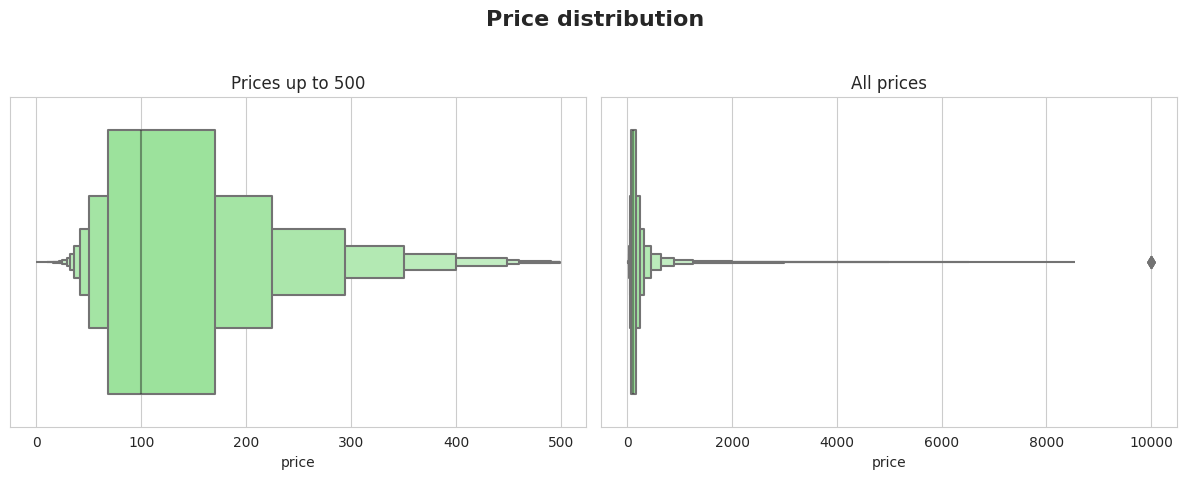

In [10]:
filtered = data[data['price'] < 500]

sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 строка, 2 столбца

sns.boxenplot(x=(filtered['price']), color='lightgreen', width=0.8, ax=axes[0])
axes[0].set_title('Prices up to 500')

sns.boxenplot(x='price', data=data, color='lightgreen', width=0.8, ax=axes[1])
axes[1].set_title('All prices')

fig.suptitle('Price distribution', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Улучшаем расположение, чтобы избежать перекрытия
plt.show()


## 🏙️ Number of objects by district

Let's build a histogram of the number of objects in different districts of New York.

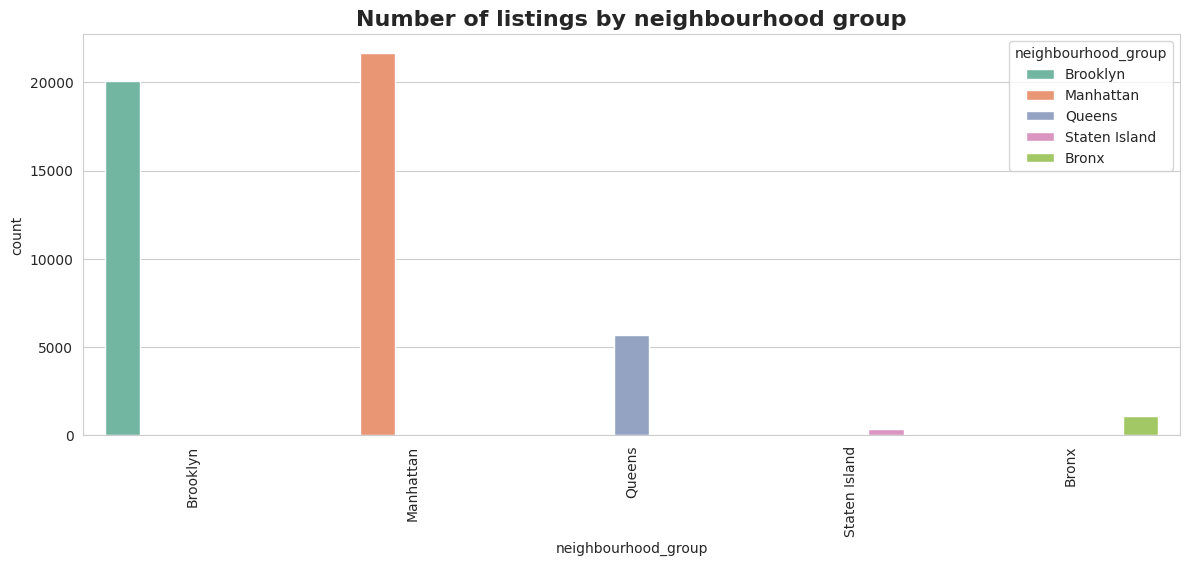

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='neighbourhood_group', hue='neighbourhood_group', data=data, palette='Set2') 
plt.xticks(rotation=90)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.title('Number of listings by neighbourhood group', fontsize=16, fontweight='bold')
plt.show()


## 🗺️ Geographic distribution of Airbnb properties

The map shows the distribution of rental properties by coordinates (`longitude` and `latitude`).

Different areas (`neighbourhood_group`) are highlighted in color. You can see which parts of New York City have the most listings.

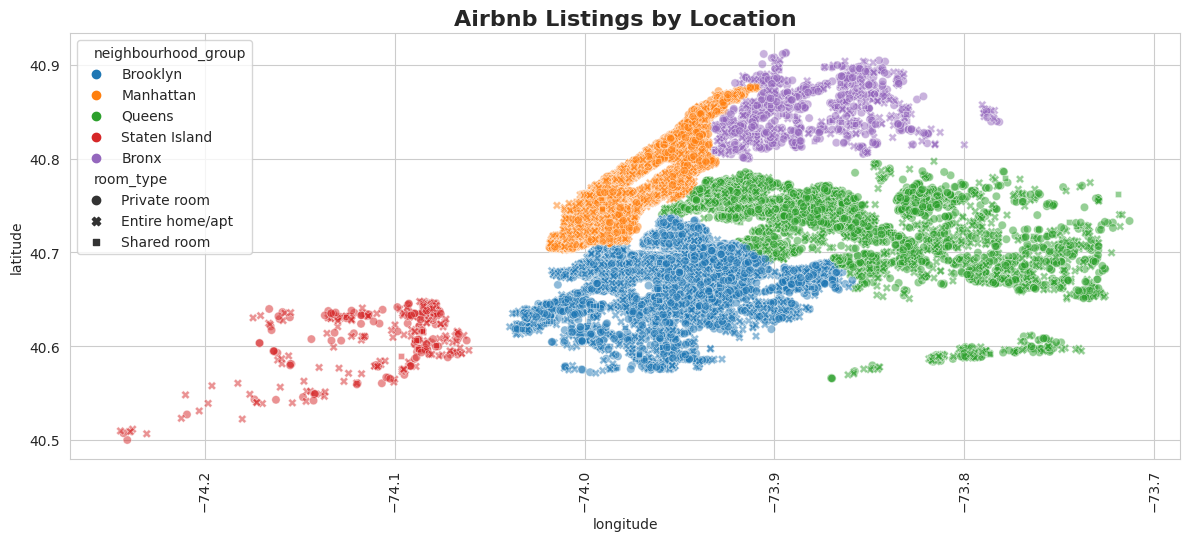

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', style='room_type', data=data, alpha=0.5)
plt.xticks(rotation=90)
plt.title('Airbnb Listings by Location' , fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 💬 Relationship between price and number of reviews

Let's see if there is a relationship between the rental price and the number of reviews.

In [13]:
data.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

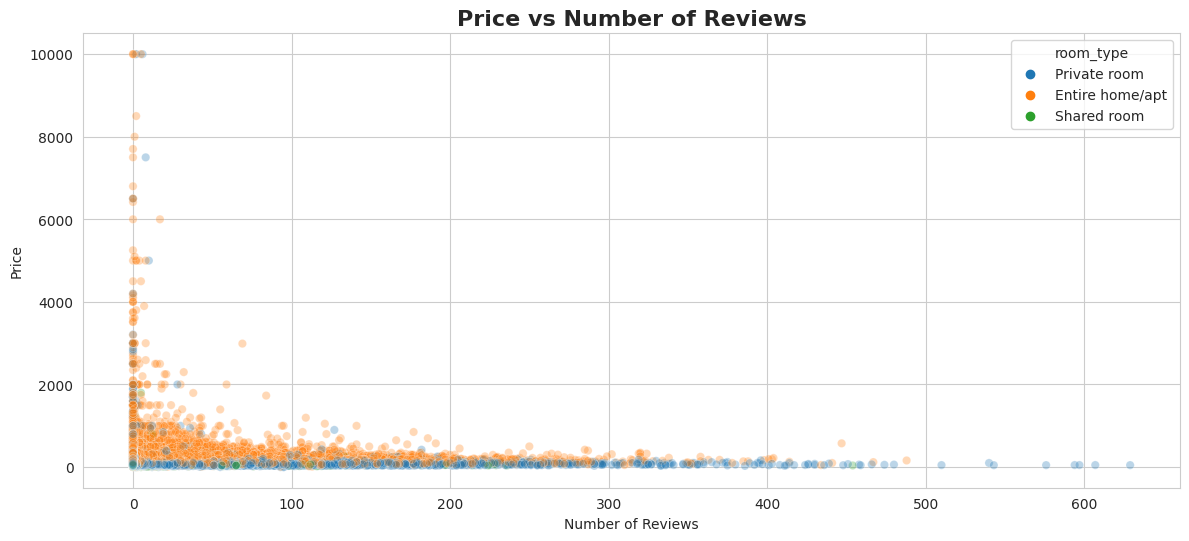

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='number_of_reviews',
    y='price',
    hue='room_type',
    data=data,
    alpha=0.3
)
plt.title('Price vs Number of Reviews', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.grid(True)
plt.show()


## 📌 Summary

- The dataset includes over 48,000 listings in New York City across different neighbourhoods;
- Most listings are located in Manhattan and Brooklyn;
- Prices vary greatly, with strong outliers; most properties are under $500 per night;
- Listings with the highest prices do not necessarily have the most reviews;
- The data can be used for building price prediction models or analytical dashboards.
